# HW7 NaiveBayes
Author : Nimit Sanjay Shah

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import math as m
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#reading the data in with missing header
train = pd.read_csv('mnist_train.csv', header=None)
test = pd.read_csv('mnist_test.csv', header=None)

In [6]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [7]:
#printing a sample of data
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#extracting the label into list
label_train = train.iloc[:,0]
label_test = test.iloc[:,0]

In [9]:
#extracting the pixels
pixel_train = train.iloc[:,1:]
pixel_test = test.iloc[:,1:]

## 1) Priors P(class):

In [10]:
#extracting unique digits from the labels
uniq_label = list(set(label_train))

#itterating through the unique digits
prior_prob = round((label_train.value_counts()) / (len(label_train)),3)

#Printing Prior Prob
print("Digit""\t""Prior Probability")
prior_prob =  prior_prob.sort_index(ascending=True)
print(prior_prob)

Digit	Prior Probability
0    0.099
1    0.112
2    0.099
3    0.102
4    0.097
5    0.090
6    0.099
7    0.104
8    0.098
9    0.099
Name: 0, dtype: float64


## 2) Estimate the likelihoods: 

In [11]:
#intializing list for index
index = []
#loop for appending index of similar digits in list
for i in uniq_label:
    index.append(train[train[0] == i].index)

In [12]:
train[train[0] == 1]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59958,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59965,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59979,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#initializing a list for train dataset sorted by labels
digit = []

#itterates through unique labels
for i in uniq_label:
    df_train = (train.iloc[index[i]])
    #digit.append(df_train.values)
    pixel_t = df_train.values #Converts to array
    pixel_train_binary = pixel_t > 255/2
    pixel_train_binary = pixel_train_binary.astype(int)
    digit.append(pixel_train_binary) #appending array to the list digit


In [14]:
#defining function for likelihood
def likeli(data,like0,like1,k):
    for i in range(0,10):  #itterates through unique labels
        prob0_list = []
        prob1_list = []
        prob0_list.append(i)
        prob1_list.append(i)
        dig = digit[i]
        count_total = len(digit[i])
        for j in range(1,785):   #itterates through columns of train
            uniq, count = np.unique(dig[:,j], return_counts=True)
            #print(uniq,count)
            if (len(uniq) == 2):
                count0 = count[0]
                count1 = count[1]
            elif(uniq == 1):
                count0 = 0
                count1 = count[0]
            else:
                count0 = count[0]
                count1 = 0
            #Calculating likelihood
            prob0 = (count0+k)/(count_total+(k*2)) 
            prob1 = (count1+k)/(count_total+(k*2))
            #appending to the list 
            prob0_list.append(prob0) 
            prob1_list.append(prob1)
        prob0_list.append(k)
        prob1_list.append(k)
        #appending list to the DataFrame
        like0.loc[len(like0.index)] = prob0_list
        like1.loc[len(like1.index)] = prob1_list
    #break


In [15]:
#intializing Dataframes with columns
likelihood_prob_0 = pd.DataFrame(columns=range(0,785))
likelihood_prob_1 = pd.DataFrame(columns=range(0,785))
likelihood_prob_0['K'] = 0
likelihood_prob_1['K'] = 0
#itterates through k 1~5
for k in range(1,6):
    likeli(digit,likelihood_prob_0,likelihood_prob_1,k) #function calls

In [16]:
print("K1")
print("P(F682 = 0|class = 5):",round(likelihood_prob_0.iat[5,682],4))
print("P(F772 = 1|class = 9):",round(likelihood_prob_1.iat[9,772],4))

K1
P(F682 = 0|class = 5): 0.8505
P(F772 = 1|class = 9): 0.001


In [17]:
print("K2")
print("P(F682 = 0|class = 5):",round(likelihood_prob_0.iat[45,682],4))
print("P(F772 = 1|class = 9):",round(likelihood_prob_1.iat[49,772],3))

K2
P(F682 = 0|class = 5): 0.8499
P(F772 = 1|class = 9): 0.002


## 3) Maximum a Posteriori(MAP):

In [18]:
#Converting dataframe to arrays
pixel_te = test.values
pixel_test_binary = pixel_te > 225/2
pixel_test_binary = pixel_test_binary.astype(int)

In [19]:
#initializing lists and DataFrames
k_inde = [0,0,10,20,30,40]
posterior_prob_k1 = pd.DataFrame(columns=range(0,10))
posterior_label_k1 = {}
posterior_prob_k2 = pd.DataFrame(columns=range(0,10))
posterior_label_k2 = {}
posterior_prob_k3 = pd.DataFrame(columns=range(0,10))
posterior_label_k3 = {}
posterior_prob_k4 = pd.DataFrame(columns=range(0,10))
posterior_label_k4 = {}
posterior_prob_k5 = pd.DataFrame(columns=range(0,10))
posterior_label_k5 = {}
block_post_prob = [0,posterior_prob_k1, posterior_prob_k2, posterior_prob_k3, posterior_prob_k4, posterior_prob_k5]
block_post_label = [0,posterior_label_k1, posterior_label_k2, posterior_label_k3, posterior_label_k4, posterior_label_k5]
#converting dataframe to arrays
likelihood_prob_0_array = likelihood_prob_0.values
likelihood_prob_1_array = likelihood_prob_1.values

In [20]:
#Calculating posterior probability
for k in range(1,6):  #itterates through k 1~5
    for i in range(len(pixel_test_binary[:,0])): #itterates through rows of test
        posterior_digit = []
        e = k_inde[k]
        for d in range(0,10):  #itterates through unique labels
            posterior = 0
            posterior += np.log(prior_prob[d])
            for l in range(1,785): # itterates through columns of test
                j = (pixel_test_binary[i,l]) #extracting value of a cell
                if (j == 0):
                    posterior += np.log(likelihood_prob_0_array[e,l])
                else:
                    posterior += np.log(likelihood_prob_1_array[e,l])
            posterior_digit.append(posterior) #appending posterior of each digit
            e +=1
        name = block_post_prob[k]
        name.loc[len(name.index)] = posterior_digit
        block_post_label[k].update({(max(posterior_digit)): (posterior_digit.index(max(posterior_digit)))})        
        

In [21]:
print("K=1")
print("P(class = 5|f1, f2, ..., f784):",posterior_prob_k1.iat[0,5])
print("P(class = 7|f1, f2, ..., f784):",posterior_prob_k1.iat[0,7])

K=1
P(class = 5|f1, f2, ..., f784): -218.99850854275212
P(class = 7|f1, f2, ..., f784): -116.53423795667491


In [22]:
print("K=5")
print("P(class = 5|f1, f2, ..., f784):",posterior_prob_k5.iat[0,5])
print("P(class = 7|f1, f2, ..., f784):",posterior_prob_k5.iat[0,7])

K=5
P(class = 5|f1, f2, ..., f784): -218.4816467572783
P(class = 7|f1, f2, ..., f784): -116.92303932191803


## 4) Classification Rate of performance:

In [31]:
label_predicted1 = list(posterior_label_k1.values())
results = metrics.accuracy_score(label_test,label_predicted1)
print("Accuracy for K=1:",results)

Accuracy for K=1: 0.8474


In [24]:
label_predicted2 = list(posterior_label_k2.values())
results2 = metrics.accuracy_score(label_test,label_predicted2)
print("Accuracy for K=2:",results2)

Accuracy for K=2: 0.8469


In [25]:
label_predicted3 = list(posterior_label_k3.values())
results3 = metrics.accuracy_score(label_test,label_predicted3)
print("Accuracy for K=3:",results3)

Accuracy for K=3: 0.8469


In [26]:
label_predicted4 = list(posterior_label_k4.values())
results4 = metrics.accuracy_score(label_test,label_predicted4)
print("Accuracy for K=4:",results4)

Accuracy for K=4: 0.847


In [27]:
label_predicted5 = list(posterior_label_k5.values())
results5 = metrics.accuracy_score(label_test,label_predicted5)
print("Accuracy for K=5:",results5)

Accuracy for K=5: 0.8467


## 5) Confusion Matrix:

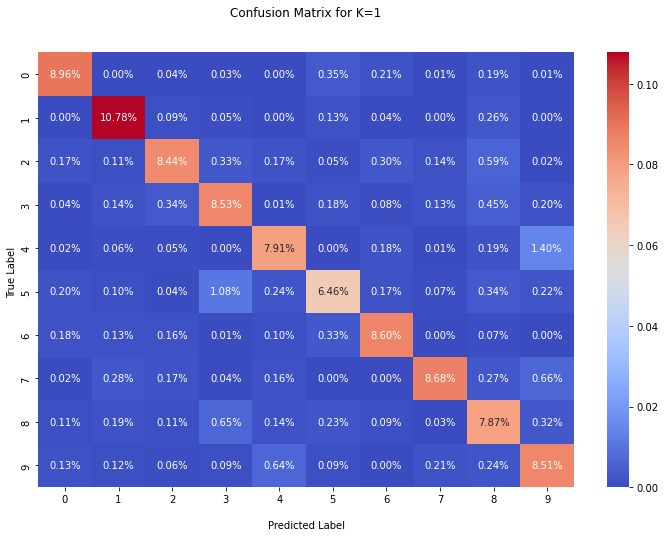

In [28]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(label_test, label_predicted1)

plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='coolwarm')

ax.set_title('Confusion Matrix for K=1\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label ')

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
print("The best Accuracy is for K=1:", round(results*100,3),"%")

The best Accuracy is for K=1: 84.74 %
